In [1]:
import warnings
warnings.filterwarnings('ignore')

from torchvision import models
from torch.utils.data import DataLoader
from src.data import DogBreedDataset, TrainTransform, get_test_time_transform
from src.utils import show_data_batch

In [2]:
train_dataset_csv = 'processed_data/train_train_dataset.csv'
val_dataset_csv = 'processed_data/train_valid_dataset.csv'
train_root_dir = 'data/train'
test_root_dir = 'data/test'

In [3]:
pretrained_model = models.inception_v3
model_input_size = 299
scale_size = 320
crop_size = model_input_size
batch_size = 32

## load train and validation dataset

In [4]:
train_transform = TrainTransform(scale_size=scale_size, crop_size=crop_size)
test_transform = get_test_time_transform(scale_size=crop_size, crop_size=crop_size)

In [5]:
train_dataset = DogBreedDataset(csv_file=train_dataset_csv, root_dir=train_root_dir, transform=train_transform)
val_dataset = DogBreedDataset(csv_file=val_dataset_csv, root_dir=train_root_dir, transform=test_transform)

In [6]:
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_data_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

## test your data loader

0 torch.Size([32, 3, 299, 299]) torch.Size([32])


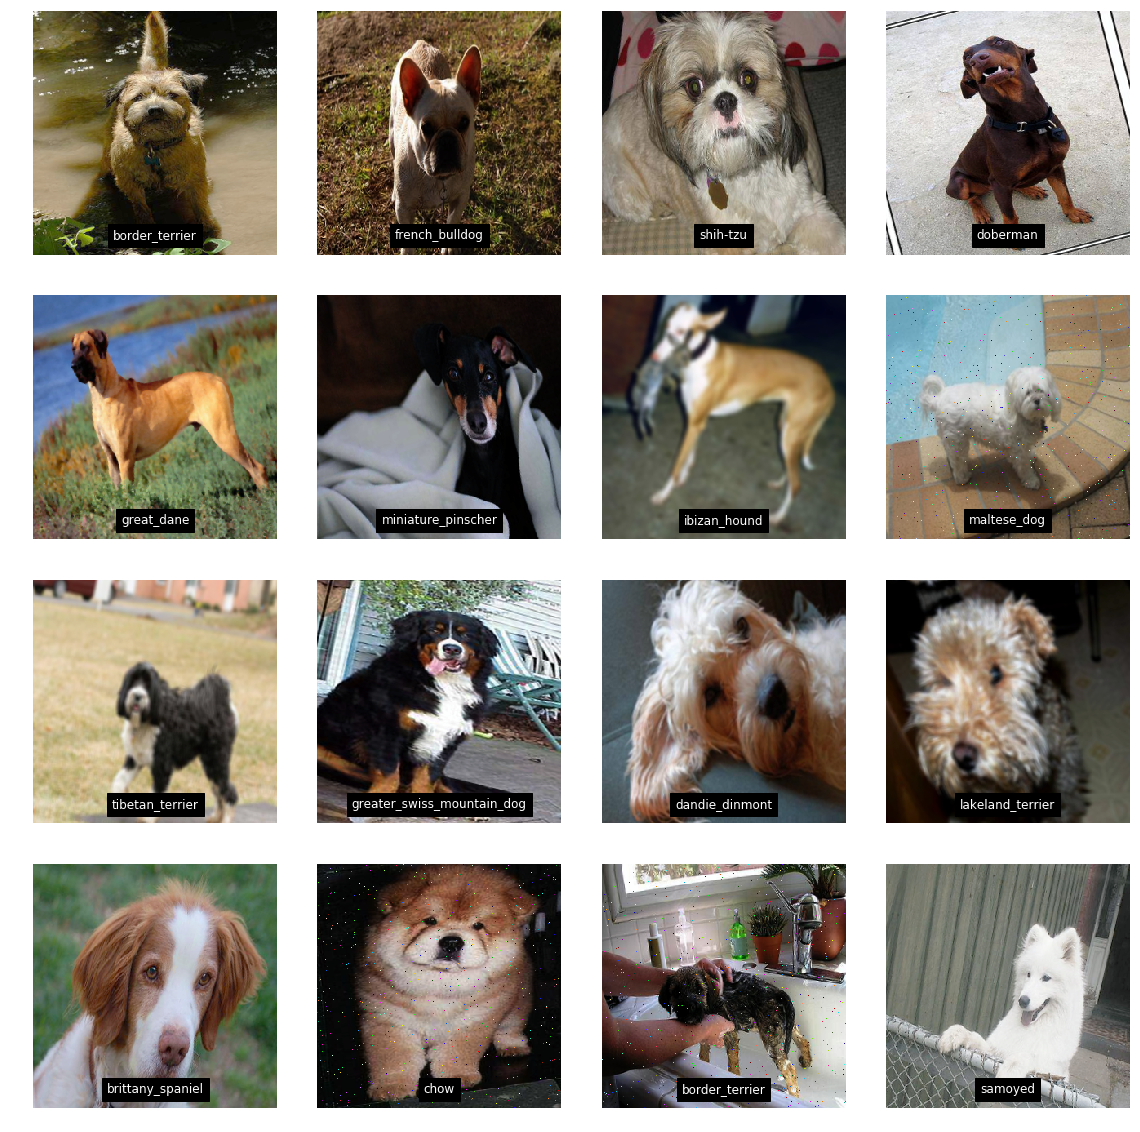

In [8]:
for batch_idx, batch_data in enumerate(train_data_loader):
    print(batch_idx, batch_data['image'].size(), batch_data['label'].size())
    show_data_batch(batch_data)
    break

0 torch.Size([32, 3, 299, 299]) torch.Size([32])


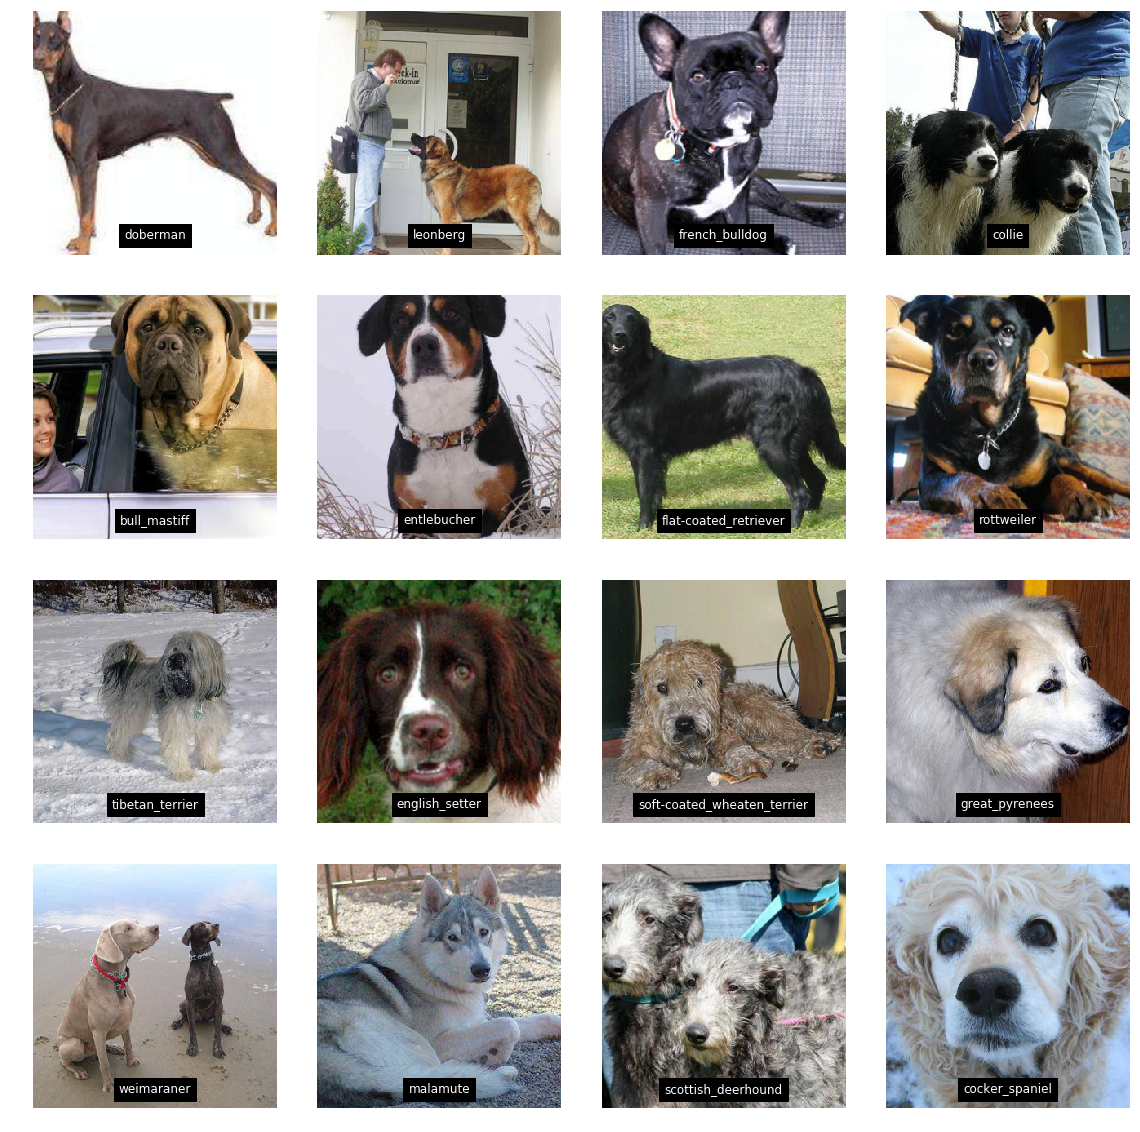

In [10]:
for batch_idx, batch_data in enumerate(val_data_loader):
    print(batch_idx, batch_data['image'].size(), batch_data['label'].size())
    show_data_batch(batch_data)
    break